# 课时6 去噪自编码器

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'1.13.1'

## 1. 导入MNIST数据集

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('E:\SoftWare_Installing\Pycharm\Pycharm WorkPlace\GAN生成对抗网络入门与实战\data\MNIST', one_hot=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting E:\SoftWare_Installing\Pycharm\Pycharm WorkPlace\GAN生成对抗网络入门与实战\data\MNIST\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting E:\SoftWare_Installing\Pycharm\Pycharm WorkPlace\GAN生成对抗网络入门与实战\data\MNIST\train-labels-idx1-ubyte.gz
Extracting E:\SoftWare_Installing\Pycharm\Pycharm WorkPlace\GAN生成对抗网络入门与实战\data\MNIST\t10k-images-idx3-ubyte.gz
Extracting E:\SoftWare_Installing\Pycharm\Pycharm WorkPlace\GAN生成对抗网络入门与实战\data\MNIST\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


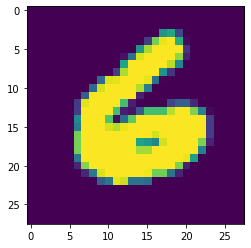

In [6]:
# 选取其中的一张图片进行展示
img = mnist.train.images[18]
plt.imshow(img.reshape((28,28)))

In [10]:
mnist.train.images.shape

(55000, 784)

In [11]:
# 定义自编码器中间的压缩层的神经元个数
hidden_units = 64
input_units = mnist.train.images.shape[1]

In [12]:
inputs = tf.placeholder(dtype=tf.float32, shape=[None, input_units], name='inputs')
targets = tf.placeholder(dtype=tf.float32, shape=[None, input_units], name='targets')

In [13]:
hidden = tf.layers.dense(inputs=inputs, units=hidden_units, activation=tf.nn.relu)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


In [14]:
logits = tf.layers.dense(inputs=hidden, units=input_units, activation=None)
outputs = tf.sigmoid(logits, name='outputs')

In [15]:
loss = tf.reduce_sum(tf.square(outputs - inputs))

In [16]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)

In [17]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [18]:
epochs = 50
batch_size = 128
scale = 0.6

In [19]:
for i in range(epochs):
    epoch_loss = []
    for x in range(mnist.train.num_examples // batch_size):
        batch = mnist.train.next_batch(batch_size=batch_size)
        batch_loss, _ = sess.run([loss, optimizer],
                                 feed_dict={inputs:batch[0]+scale*np.random.normal(size=batch[0].shape),
                                            targets:batch[0]})
        epoch_loss.append(batch_loss)
    print('Epoch is %i'%(i+1), 'Training Loss is %.3f'%(sum(epoch_loss)/len(epoch_loss)))

Epoch is 1 Training Loss is 38183.711
Epoch is 2 Training Loss is 36980.932
Epoch is 3 Training Loss is 36952.775
Epoch is 4 Training Loss is 36915.355
Epoch is 5 Training Loss is 36913.262
Epoch is 6 Training Loss is 36908.275
Epoch is 7 Training Loss is 36873.567
Epoch is 8 Training Loss is 36898.608
Epoch is 9 Training Loss is 36891.041
Epoch is 10 Training Loss is 36891.821
Epoch is 11 Training Loss is 36867.010
Epoch is 12 Training Loss is 36877.101
Epoch is 13 Training Loss is 36873.460
Epoch is 14 Training Loss is 36855.692
Epoch is 15 Training Loss is 36860.133
Epoch is 16 Training Loss is 36834.638
Epoch is 17 Training Loss is 36840.822
Epoch is 18 Training Loss is 36845.110
Epoch is 19 Training Loss is 36860.785
Epoch is 20 Training Loss is 36833.841
Epoch is 21 Training Loss is 36837.009
Epoch is 22 Training Loss is 36817.197
Epoch is 23 Training Loss is 36833.289
Epoch is 24 Training Loss is 36810.749
Epoch is 25 Training Loss is 36841.959
Epoch is 26 Training Loss is 36840

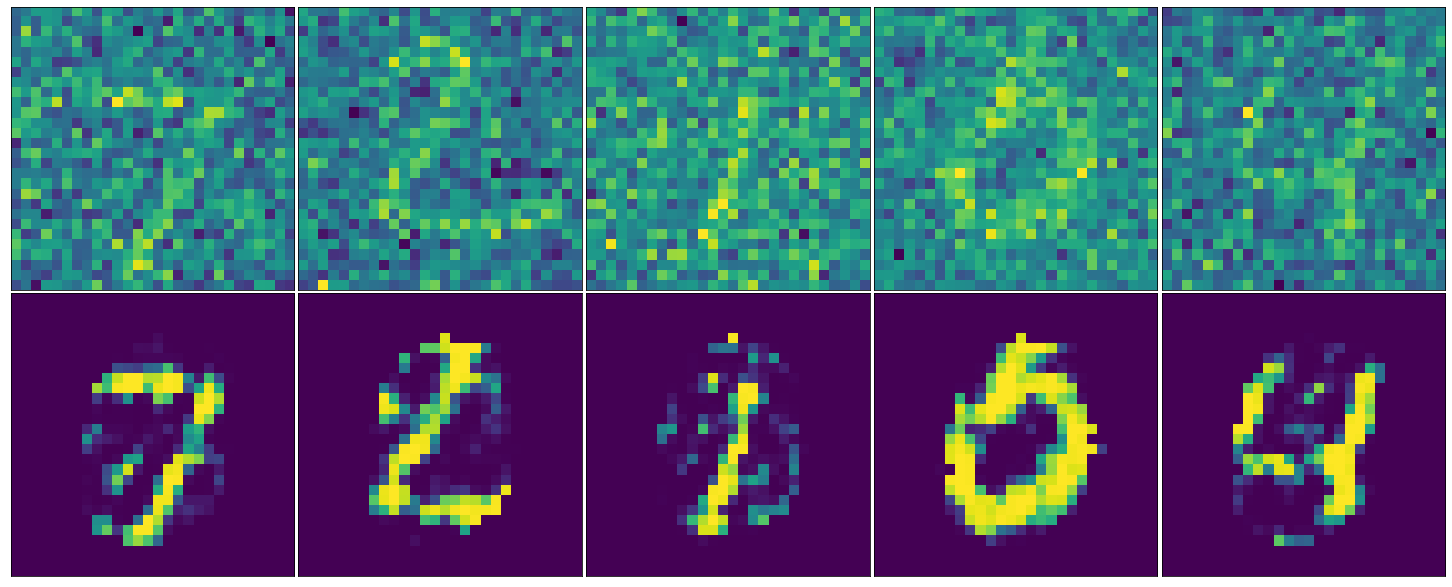

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(20, 8))
test_imgs = mnist.test.images[:5]
test_imgs_with_noise = test_imgs + scale*np.random.normal(size=test_imgs.shape)
reconstructed, compressed = sess.run([outputs, hidden], 
                                     feed_dict={inputs:test_imgs_with_noise,
                                                targets:test_imgs})
for image, row in zip([test_imgs_with_noise, reconstructed], ax):
    for img, ax in zip(image, row):
        ax.imshow(img.reshape((28, 28)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
fig.tight_layout(pad=0.1)

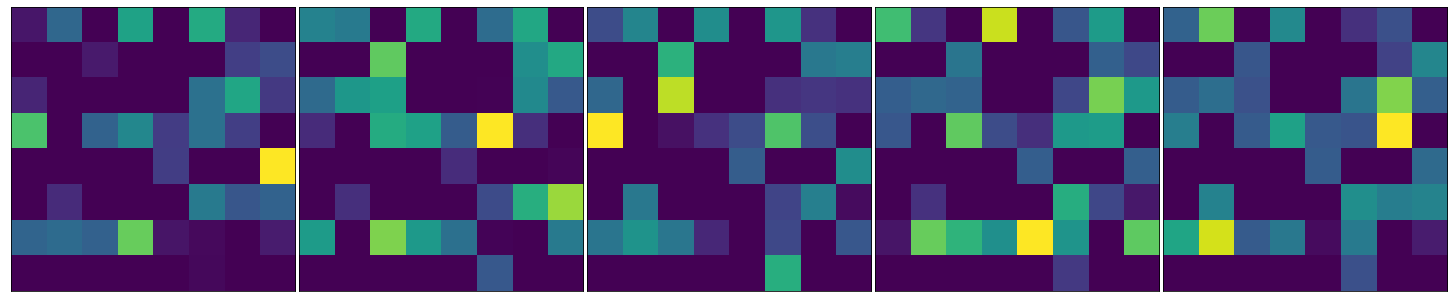

In [37]:
# 绘制出中间的压缩的向量的图像
fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(20, 4))
for img, ax in zip(compressed, axes):
    ax.imshow(img.reshape((8, 8)))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
fig.tight_layout(pad=0)